In [7]:
import os

!pip install matplotlib -q

import pandas as pd

## Data loading

In [8]:
!ls $HOME/ds-bowl-from-scratch/raw-data

sample_submission.csv test.csv              train_labels.csv
specs.csv             train.csv


In [9]:
home = os.environ['HOME']
home

'/Users/adam'

In [10]:
# os.path OR pathlib
home = os.path.join(os.environ['HOME'], 'ds-bowl-from-scratch', 'raw-data')
print(home)

/Users/adam/ds-bowl-from-scratch/raw-data


In [11]:
os.listdir(home)

['train_labels.csv',
 'test.csv',
 'specs.csv',
 'train.csv',
 'sample_submission.csv']

In [17]:
raw_data = {}

for fi in os.listdir(home):
    if 'csv' in fi:
        print(fi)
        raw_data[fi] = pd.read_csv(os.path.join(home, fi), nrows=10000)

train_labels.csv
test.csv
specs.csv
train.csv
sample_submission.csv


## Basic data inspection

Look at all csvs

In [14]:
for name, df in raw_data.items():
    print(name, df.shape)
    print(df.columns)
    print(' ')

train_labels.csv (17690, 7)
Index(['game_session', 'installation_id', 'title', 'num_correct', 'num_incorrect', 'accuracy', 'accuracy_group'], dtype='object')
 
test.csv (1156414, 11)
Index(['event_id', 'game_session', 'timestamp', 'event_data', 'installation_id', 'event_count', 'event_code', 'game_time', 'title', 'type', 'world'], dtype='object')
 
specs.csv (386, 3)
Index(['event_id', 'info', 'args'], dtype='object')
 
train.csv (11341042, 11)
Index(['event_id', 'game_session', 'timestamp', 'event_data', 'installation_id', 'event_count', 'event_code', 'game_time', 'title', 'type', 'world'], dtype='object')
 
sample_submission.csv (1000, 2)
Index(['installation_id', 'accuracy_group'], dtype='object')
 


## Inspection of the target

Four classes

In [18]:
labels = raw_data['train_labels.csv']
set(labels.loc[:, 'accuracy_group'])

{0, 1, 2, 3}

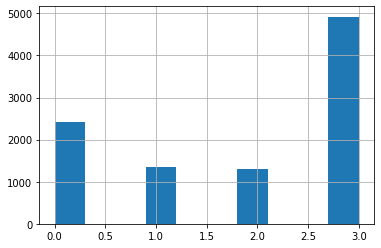

In [19]:
labels.loc[:, 'accuracy_group'].hist()

Number of installs

In [20]:
len(set(labels.loc[:, 'installation_id']))

1999

In [21]:
def inspect_df(data, csv):
    df = data[csv]
    for col in df.columns:
        print(col)
        uniq = len(set(df.loc[:, col]))
        print('num. uniques {}'.format(uniq))
        print(uniq / df.shape[0])
        print(' ')
        
inspect_df(raw_data, 'train_labels.csv')

game_session
num. uniques 10000
1.0
 
installation_id
num. uniques 1999
0.1999
 
title
num. uniques 5
0.0005
 
num_correct
num. uniques 2
0.0002
 
num_incorrect
num. uniques 32
0.0032
 
accuracy
num. uniques 26
0.0026
 
accuracy_group
num. uniques 4
0.0004
 


In [22]:
df = data['train_labels.csv']

mask = df['accuracy_group'] == 3
mask = df.loc[:, 'accuracy_group'] == 3

sub = df.loc[mask, :]

sub.head()

NameError: name 'data' is not defined

In [ ]:
set(sub.loc[:, 'num_correct'])

In [ ]:
set(df.loc[:, 'num_correct'])

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
# hardness of games

In [ ]:
!pip install seaborn -q
import seaborn as sns

sns.pairplot(data['train_labels.csv'])

In [ ]:
mask = df['num_correct'] == 1

mask

In [ ]:
mask2 = df['num_incorrect'] > 0

df.loc[mask & mask2, :].loc[:, 'num_incorrect'].hist()

In [ ]:
max(df.loc[mask & mask2, :].loc[:, 'num_incorrect'])